# Statistical Analysis | EDA -  Dataset

In [2]:
# Libraries Needed:
import pandas as pd
import seaborn as sns
from scipy import stats


# Extra Lib to ingnore some warnings: 
import warnings
warnings.filterwarnings('ignore')

In [3]:
path = '/home/omkar/Omkar Pawar/Data Science/Exploratory Data Analysis/Assets/Raw Data Sets/winequality-red.csv'

df = pd.read_csv(path, sep=';') # by default values sep= ',' | CSV = comma separated values
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
df['volatile acidity']

0       0.700
1       0.880
2       0.760
3       0.280
4       0.700
        ...  
1594    0.600
1595    0.550
1596    0.510
1597    0.645
1598    0.310
Name: volatile acidity, Length: 1599, dtype: float64

<Axes: xlabel='volatile acidity', ylabel='Density'>

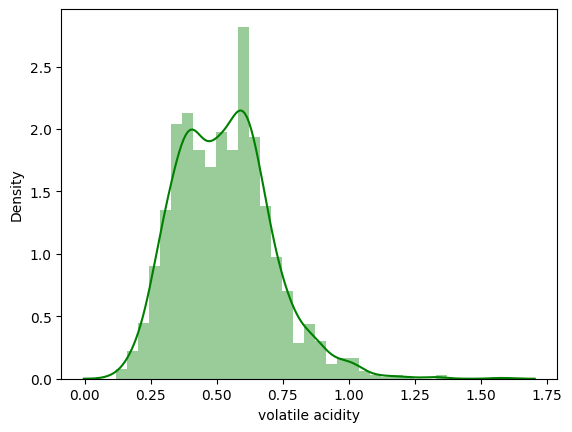

In [5]:
sns.distplot(df['volatile acidity'], kde=True, color= 'green')

<Axes: xlabel='citric acid', ylabel='Density'>

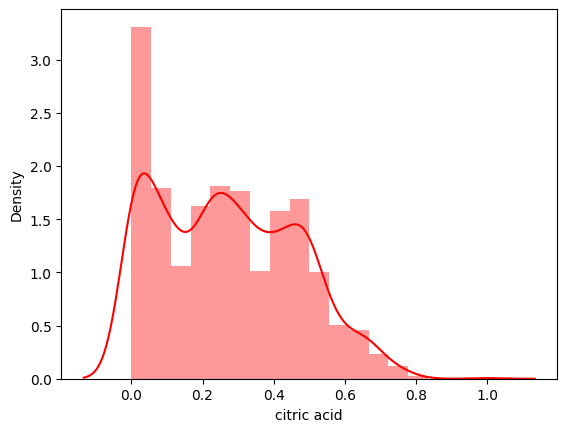

In [6]:
sns.distplot(df['citric acid'], color='red')

### Shapiro Wilk Test:

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html

The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution.

The chance of rejecting the null hypothesis when it is true is close to 5% regardless of sample size.

in short if `pvalue > 0.05` then we fail to reject null hypothesis.

means we accept the null hypothesis.

Hence Distribution is normal with `pvalue > 0.05`

In [7]:
stats.shapiro(df['volatile acidity']) # Normal Distribution

ShapiroResult(statistic=0.9743338823318481, pvalue=2.686385373947307e-16)

In [8]:
stats.shapiro(df['citric acid'])

ShapiroResult(statistic=0.955294668674469, pvalue=1.0233944777578548e-21)

In [9]:
# Creating normally distributed data:

from numpy.random import randn

normal_dist = randn(500)
normal_dist

array([ 5.15936501e-01,  1.29448222e+00, -6.49719181e-01,  2.80989026e+00,
        1.07557769e+00,  8.03640323e-01, -8.59229658e-01,  8.58222008e-01,
       -2.89063833e-01, -1.08243797e-01, -5.07932403e-02,  1.57872985e+00,
        1.84905669e+00,  1.31959291e+00,  2.35983630e+00,  3.53585538e-01,
       -4.64845180e-01, -2.17625611e-01,  6.69275889e-01,  7.44172034e-01,
        6.67599910e-01, -1.62585089e-01, -2.05305959e+00,  3.36863997e-01,
        6.40416942e-01, -2.10716751e-01, -1.34601049e+00, -9.14158015e-01,
       -2.46902184e+00, -1.20452713e-01,  7.48755445e-02, -1.60243397e+00,
       -3.38108396e-01,  9.69119863e-01, -7.77377693e-01, -5.56524247e-01,
        1.46594649e-01, -1.26344737e+00,  3.09355145e-01,  1.35711584e+00,
        1.64211134e+00, -7.03362117e-01,  3.57662244e-01, -4.23938739e-01,
        4.63986499e-01, -1.11759169e+00,  2.08119667e-01,  2.09463922e-01,
        1.08275278e+00, -5.60172167e-01, -4.63950781e-01, -4.32840951e-01,
       -2.85064961e-01,  

<Axes: ylabel='Density'>

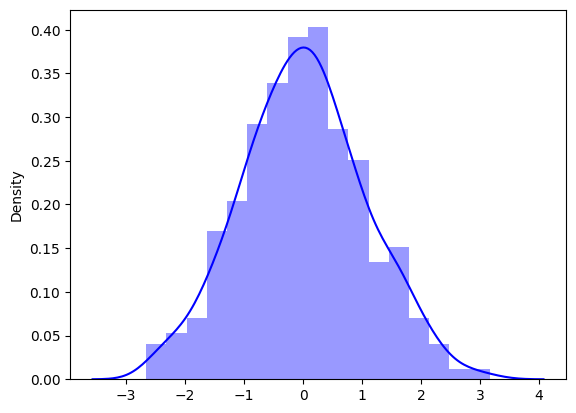

In [10]:
sns.distplot(normal_dist, color='blue')

In [11]:
stats.shapiro(normal_dist)

ShapiroResult(statistic=0.9975696802139282, pvalue=0.6859031915664673)

In [12]:
# creating a function to tell if our data is normally distributed or not:

# Null Hypothesis: the data was drawn from a normal distribution.
# Alternate Hypothesis: the data was not drawn from a normal distribution.

import numpy as np
import scipy.stats as stats
alpha = 0.05 # alpha - significance level 

def is_normal(data):
    if stats.shapiro(data).pvalue > alpha:
        print(f'We fail to reject the null hypothesis, Hence your dataset is normally distributed')
    else:
        print(f'We reject the null hypothesis, Hence your dataset is not normally distributed')


In [13]:
is_normal(normal_dist)

We fail to reject the null hypothesis, Hence your dataset is normally distributed


In [14]:
is_normal(df['volatile acidity'])

We reject the null hypothesis, Hence your dataset is not normally distributed


In [15]:
is_normal(df['citric acid'])

We reject the null hypothesis, Hence your dataset is not normally distributed


* Note: [Using Shapiro test might not be an Ideal thing to do every time!](https://towardsdatascience.com/stop-testing-for-normality-dba96bb73f90)

#### Confidence Interval and Margin of Error:

In [16]:
population=np.random.randint(10,20,50)

In [17]:
population

array([14, 19, 13, 13, 12, 10, 14, 14, 19, 13, 18, 14, 13, 14, 10, 17, 16,
       11, 18, 16, 17, 10, 11, 15, 17, 15, 16, 14, 10, 13, 18, 11, 11, 16,
       14, 14, 13, 13, 16, 15, 14, 19, 18, 11, 12, 15, 12, 14, 11, 12])

In [18]:
sample1=np.random.choice(population,20)
sample2=np.random.choice(population,20)
sample3=np.random.choice(population,20)
sample4=np.random.choice(population,20)

In [19]:
mean_of_samples=[]

all_sample=[sample1,sample2,sample3,sample4]

for sample in all_sample:
    mean_of_samples.append(np.mean(sample))

In [20]:
import scipy.stats as stats

In [21]:
z_critical = stats.norm.ppf(q=0.975)
z_critical

1.959963984540054

In [23]:
t_critical = stats.t.ppf(q=0.975,df=24)
t_critical 

2.0638985616280205

In [25]:
margin_of_error = z_critical * (np.std(mean_of_samples)/np.sqrt(20))
margin_of_error

0.12139026297445096

In [28]:

#  margin of Error:
# Lower confidence limit:
lcl = np.mean(mean_of_samples)- margin_of_error

# Upper confidence limit:
ucl = np.mean(mean_of_samples) + margin_of_error

# Confidence Interval Range: 
print(f'lower confidence limit:  {lcl}')
print(f'Upper confidence limit:  {ucl}')


lower confidence limit:  14.166109737025547
Upper confidence limit:  14.408890262974449


## Z - Test : 


In [29]:
from numpy.random import randn
population=randn(100)
population

array([-1.27645768,  2.29002596,  1.3047887 , -0.8769511 ,  0.10110606,
       -0.36184601, -0.50059779, -1.07944315, -1.38150668, -0.97846248,
        0.5933429 , -1.91280156, -0.47548062, -0.875072  ,  0.4444708 ,
       -1.28863106,  0.17266168,  1.49939204, -0.37449909, -0.95357875,
        1.00043367,  0.93799292, -0.32547492, -1.31261629, -1.25495777,
        1.01745127,  0.3079715 , -0.09856916,  0.84789706, -1.60811056,
       -1.11874566, -0.75017921,  0.60276208,  0.84047712, -1.70122114,
       -0.04378134, -1.37954394, -0.32213853, -1.35627339,  1.04832214,
       -1.14320272, -1.68762389,  0.28315987,  1.76212615, -0.39130452,
       -0.13131773, -1.13954131,  1.29356821, -0.12722877,  0.40831299,
       -1.92422277, -1.54043993,  0.35367221,  1.38455328, -0.03042277,
        0.20241684,  0.85736812, -0.31217907,  1.27764374, -0.13983869,
        0.51773959, -1.49696112, -1.2922658 , -0.05228666, -0.64131731,
        0.10619117,  0.49250869, -0.8843364 ,  1.22649965, -0.89

<Axes: ylabel='Density'>

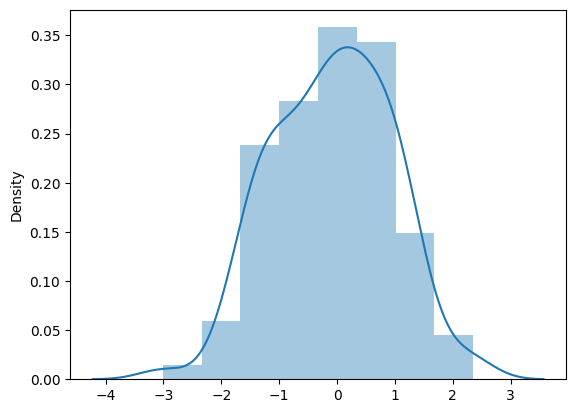

In [30]:
sns.distplot(population)

In [31]:
print(f"here is a mean of the population: {np.mean(population)},here is a std dev {np.std(population)}")

here is a mean of the population: -0.08261126496485166,here is a std dev 1.0129859480594994


# T - Test : 

## Chi - Square Test : 